## ***b) Veri Kümesine Genel Bakış *** (TARGETSİZ)

In [3]:
import pandas as pd
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

# Dosya yolu (kendi drive yolunu buraya yazman gerekecek!)
file_path = '/content/drive/MyDrive/merged_fix_to_hour.csv'

# CSV'yi yükle
df = pd.read_csv(file_path)

# Veri kümesi adı ve bağlantısı (manuel gir)
dataset_name = 'merged_fix_to_hour.csv'
dataset_link = 'https://www.kaggle.com/datasets/wlwwwlw/bitcoin-pulse-market-trends-and-fear-dataset?select=merged_fix_to_hour.csv'

# Kayıt ve özellik sayısı
num_records = df.shape[0]
num_features = df.shape[1]

# Eksik değerler
null_values = df.isnull().sum()

# Sayısal olmayan sütunlar
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()


# Çıktılar
print(f"▶️ Veri Kümesi Adı: {dataset_name}")
print(f"▶️ Veri Kümesi Web Bağlantısı: {dataset_link}")
print(f"▶️ Kayıt Sayısı: {num_records}")
print(f"▶️ Özellik Sayısı: {num_features}")
print("\n▶️ Sayısal Olmayan Özellikler:")
print(non_numeric_columns)
# Target henüz belirlenmediği için şimdilik boş bırakıyoruz
print(f"▶️ Hedef Sınıfların Sayısı: Target henüz seçilmedi")
print(f"▶️ Sınıf Başına Örnek Sayısı: Target henüz seçilmedi")

# Genel bakış
print("▶️ DataFrame Bilgileri:")
print(df.info())

print("\n▶️ Sayısal Özet:")
print(df.describe())

print("\n▶️ İlk 5 Kayıt:")
print(df.head())

print("\n▶️ Benzersiz Değer Sayısı (nunique):")
print(df.nunique())

print("\n▶️ Eksik (Null) Değer Sayısı:")
print(df.isnull().sum())


Mounted at /content/drive
▶️ Veri Kümesi Adı: merged_fix_to_hour.csv
▶️ Veri Kümesi Web Bağlantısı: https://www.kaggle.com/datasets/wlwwwlw/bitcoin-pulse-market-trends-and-fear-dataset?select=merged_fix_to_hour.csv
▶️ Kayıt Sayısı: 17515
▶️ Özellik Sayısı: 131

▶️ Sayısal Olmayan Özellikler:
['Datetime']
▶️ Hedef Sınıfların Sayısı: Target henüz seçilmedi
▶️ Sınıf Başına Örnek Sayısı: Target henüz seçilmedi
▶️ DataFrame Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17515 entries, 0 to 17514
Columns: 131 entries, Datetime to google_trends_bitcoin
dtypes: float64(128), int64(2), object(1)
memory usage: 17.5+ MB
None

▶️ Sayısal Özet:
       BNB_USDT_1h_open  BNB_USDT_1h_high  BNB_USDT_1h_low  BNB_USDT_1h_close  \
count      17515.000000      17515.000000     17515.000000       17515.000000   
mean         452.026374        453.859048       450.048366         452.040836   
std          174.379062        175.252661       173.424565         174.379698   
min          203.53280

***b.1)Targetli çıktılar***

In [4]:
# Target oluştur
df['target_class'] = (df['BTC_USDT_1h_close'].shift(-1) > df['BTC_USDT_1h_close']).astype(int)
df['target_reg'] = df['BTC_USDT_1h_open'].shift(-1)

# Drive’a kaydet
output_path = '/content/drive/MyDrive/ML_Project_WorkingCopy.csv'
df.to_csv(output_path, index=False)
print("Çalışma kopyası Drive’a kaydedildi:", output_path)

# Classification target özet
print("▶️ Hedef Sınıfların Sayısı (Classification):", df['target_class'].nunique())
print("▶️ Sınıf Başına Örnek Sayısı (Classification):\n", df['target_class'].value_counts())

# Regression target özet
print("\n▶️ Regression Target (Next BTC Open) Özeti:")
print(df['target_reg'].describe())

Çalışma kopyası Drive’a kaydedildi: /content/drive/MyDrive/ML_Project_WorkingCopy.csv
▶️ Hedef Sınıfların Sayısı (Classification): 2
▶️ Sınıf Başına Örnek Sayısı (Classification):
 target_class
1    8919
0    8596
Name: count, dtype: int64

▶️ Regression Target (Next BTC Open) Özeti:
count     17514.000000
mean      57128.967511
std       24161.310907
min       24924.360000
25%       30587.742500
50%       60112.960000
75%       69663.467500
max      108322.460000
Name: target_reg, dtype: float64


***b.2) Targetler kontrolü***

In [5]:
# Sadece target sütunlarına bak
print("\n▶️ Sadece Target Sütunları (İlk 5 Satır):")
print(df[['target_class', 'target_reg']].head())

# Hangi satırlarda NaN var kontrol et (son satır muhtemelen NaN olur çünkü shift(-1) var)
print("\n▶️ Target Sütunlarındaki Boş Değerler (sayım):")
print(df[['target_class', 'target_reg']].isnull().sum())



▶️ Sadece Target Sütunları (İlk 5 Satır):
   target_class  target_reg
0             0    30277.44
1             1    30240.00
2             0    30267.06
3             1    30248.96
4             1    30302.08

▶️ Target Sütunlarındaki Boş Değerler (sayım):
target_class    0
target_reg      1
dtype: int64


## ***c) Kategorik Özellik Dağılımı ***

In [6]:
# Datetime'ı datetime tipine çevir
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Yeni kategorik sütunlar çıkar
df['hour'] = df['Datetime'].dt.hour
df['day_of_week'] = df['Datetime'].dt.dayofweek + 1  # 0 → 1, 6 → 7
df['month'] = df['Datetime'].dt.month
df['year'] = df['Datetime'].dt.year

# day_of_week numarik → string gün ismine çevir
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['day_of_week_str'] = df['day_of_week'].map(day_map)

# Çalışma kopyasını tekrar Drive'a kaydet
output_path = '/content/drive/MyDrive/ML_Project_WorkingCopy.csv'
df.to_csv(output_path, index=False)
print("Güncellenmiş DataFrame Drive’a kaydedildi:", output_path)

# Kontrol çıktısı
print("\n▶️ İlk 5 Kayıt:")
print(df[['Datetime', 'hour', 'day_of_week', 'day_of_week_str', 'month', 'year']].head())


Güncellenmiş DataFrame Drive’a kaydedildi: /content/drive/MyDrive/ML_Project_WorkingCopy.csv

▶️ İlk 5 Kayıt:
             Datetime  hour  day_of_week day_of_week_str  month  year
0 2023-04-16 00:00:00     0            7          Sunday      4  2023
1 2023-04-16 01:00:00     1            7          Sunday      4  2023
2 2023-04-16 02:00:00     2            7          Sunday      4  2023
3 2023-04-16 03:00:00     3            7          Sunday      4  2023
4 2023-04-16 04:00:00     4            7          Sunday      4  2023


***c.1) Görselleştirme kısmı***

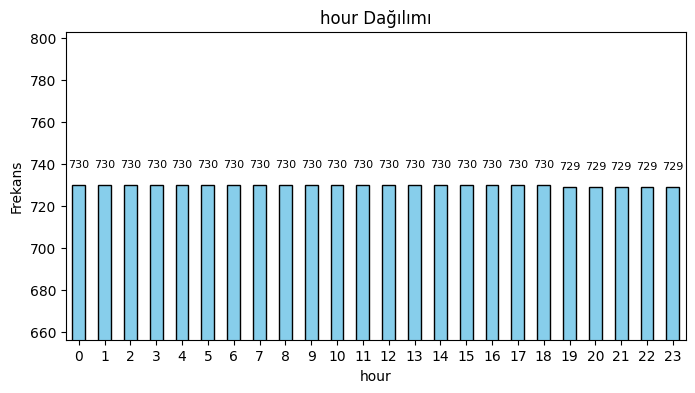

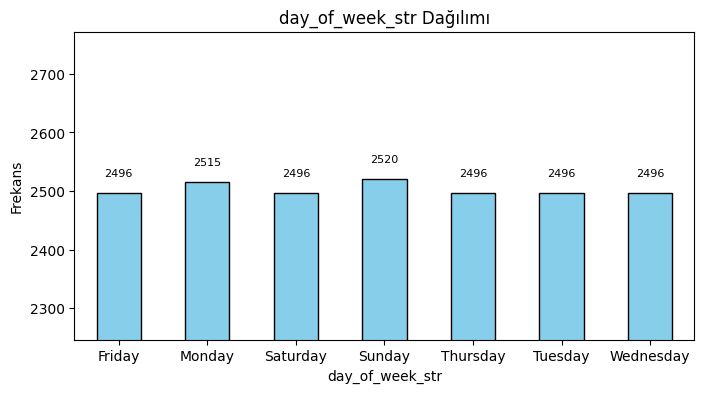

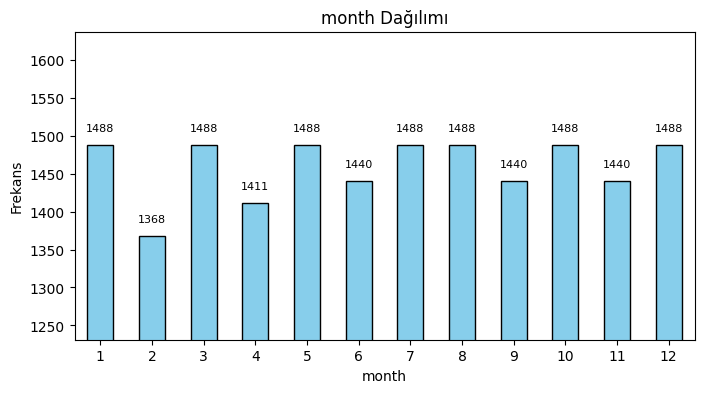

In [7]:
import matplotlib.pyplot as plt

categorical_columns = ['hour', 'day_of_week_str', 'month']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    counts = df[col].value_counts().sort_index()

    # Min ve max değerleri al
    min_count = counts.min()
    max_count = counts.max()

    # Bar plot, y eksenini min-10% ile max+10% aralığına daralt
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.ylim(min_count * 0.9, max_count * 1.1)
    plt.title(f'{col} Dağılımı')
    plt.xlabel(col)
    plt.ylabel('Frekans')
    plt.xticks(rotation=0)

    # Barların üstüne sayısal değer ekle
    for index, value in enumerate(counts):
        plt.text(index, value + (max_count * 0.01), str(value), ha='center', va='bottom', fontsize=8)

    plt.show()


## ***d) Sayısal Özellik İstatistiği***

✅ minimum değer (min)
✅ maksimum değer (max)
✅ ortalama değer (mean)

Bu, verinin:

uç değerlerini (outlier)

genel ortalamasını

ölçek aralığını

görmemizi sağlar.
Bu sayede:

normalleştirme (i) aşamasında,

eksik değer tamamlama (g) aşamasında
nasıl işlem yapacağımıza karar veririz.

In [8]:
# Sadece sayısal sütunları seç
numeric_columns = df.select_dtypes(include=['number']).columns

# Min, Max, Mean hesapla
stats_df = pd.DataFrame({
    'min': df[numeric_columns].min(),
    'max': df[numeric_columns].max(),
    'mean': df[numeric_columns].mean()
})


# İstatistikleri göster
print("▶️ Sayısal Özellik İstatistikleri:")
print(stats_df)


# Drive’a kaydetmek istersen:
output_path_stats = '/content/drive/MyDrive/ML_Project_NumericStats.csv'
stats_df.to_csv(output_path_stats)
print("Sayısal özellik istatistikleri Drive’a kaydedildi:", output_path_stats)





▶️ Sayısal Özellik İstatistikleri:
                            min           max          mean
BNB_USDT_1h_open      203.53280     783.95000    452.026374
BNB_USDT_1h_high      204.60670     794.00000    453.859048
BNB_USDT_1h_low       202.02680     775.85000    450.048366
BNB_USDT_1h_close     203.53280     783.95000    452.040836
BNB_USDT_1h_volume      7.35988   44240.97555   1073.994036
...                         ...           ...           ...
target_reg          24924.36000  108322.46000  57128.967511
hour                    0.00000      23.00000     11.497288
day_of_week             1.00000       7.00000      4.000856
month                   1.00000      12.00000      6.524008
year                 2023.00000    2025.00000   2023.785955

[136 rows x 3 columns]
Sayısal özellik istatistikleri Drive’a kaydedildi: /content/drive/MyDrive/ML_Project_NumericStats.csv


# ***e) Etiket Kodlaması (Label Encoding)***

Yani her kategoriye bir sayı atarız.

day_of_week ve month → mantıklı, çünkü doğal bir sıralama var.



In [9]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder nesnesi oluştur
le = LabelEncoder()

# day_of_week'e uygula
df['day_of_week_encoded'] = le.fit_transform(df['day_of_week'])

# Kodlama eşlemesini gör
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("▶️ Label Encoding eşlemesi (day_of_week):", mapping)

# İlk 5 kayıt göster
print(df[['day_of_week_str', 'day_of_week_encoded']].head())


▶️ Label Encoding eşlemesi (day_of_week): {np.int32(1): np.int64(0), np.int32(2): np.int64(1), np.int32(3): np.int64(2), np.int32(4): np.int64(3), np.int32(5): np.int64(4), np.int32(6): np.int64(5), np.int32(7): np.int64(6)}
  day_of_week_str  day_of_week_encoded
0          Sunday                    6
1          Sunday                    6
2          Sunday                    6
3          Sunday                    6
4          Sunday                    6


# ***f) Tek Sıcak Kodlama(One Hot Encoding)***

✅ month → çünkü:

Doğal sıralama önemli değil (1 → Ocak, 2 → Şubat, 12 → Aralık)

Modeller bu sayılardan yanlış sıralama anlamı çıkarabilir → One Hot Encoding bu hatayı engeller.

ör. month gibi kategorik ve sırasız değişkenlerde, modelin “12 büyük 1’den” gibi saçma ilişkiler kurmasını önlemek için One Hot Encoding uygularız.

In [10]:
# Eski month_ ve month_*_int sütunlarını temizle
df = df.loc[:, ~df.columns.str.startswith('month_')]

# One Hot Encoding (True/False)
one_hot_bool = pd.get_dummies(df['month'], prefix='month')

# One Hot Encoding (0/1)
one_hot_int = one_hot_bool.astype(int)
one_hot_int.columns = [col + '_int' for col in one_hot_int.columns]

# İkisini birleştir
df = pd.concat([df, one_hot_bool, one_hot_int], axis=1)

# True/False sütunları
bool_cols = [col for col in df.columns if col.startswith('month_') and not col.endswith('_int')]

# 0/1 sütunları
int_cols = [col for col in df.columns if col.endswith('_int')]

# İlk 5 kayıt True/False
print("\n▶️ One Hot Encoding True/False İlk 5 Kayıt:")
print(df[bool_cols].head())

# Bölüm çizgisi
print("\n" + "-" * 50 + "\n")

# İlk 5 kayıt 0/1
print("▶️ One Hot Encoding 0/1 İlk 5 Kayıt:")
print(df[int_cols].head())

# Çalışma kopyasını tekrar Drive'a kaydet
output_path = '/content/drive/MyDrive/ML_Project_WorkingCopy.csv'
df.to_csv(output_path, index=False)
print("\nGüncellenmiş DataFrame Drive’a kaydedildi:", output_path)



▶️ One Hot Encoding True/False İlk 5 Kayıt:
   month_1  month_2  month_3  month_4  month_5  month_6  month_7  month_8  \
0    False    False    False     True    False    False    False    False   
1    False    False    False     True    False    False    False    False   
2    False    False    False     True    False    False    False    False   
3    False    False    False     True    False    False    False    False   
4    False    False    False     True    False    False    False    False   

   month_9  month_10  month_11  month_12  
0    False     False     False     False  
1    False     False     False     False  
2    False     False     False     False  
3    False     False     False     False  
4    False     False     False     False  

--------------------------------------------------

▶️ One Hot Encoding 0/1 İlk 5 Kayıt:
   month_1_int  month_2_int  month_3_int  month_4_int  month_5_int  \
0            0            0            0            1            0   
1   

# ***g) Eksik Değerlerin İşlenmesi ***

✅ 1. Eksik veri içeren sütunları silmek %90 dan fazla eksik olanlar , hoş hiç eksik satırım yok mahşallah



In [11]:
# Eksik veri oranını hesapla
missing_ratio = df.isnull().sum() / len(df)

# %90’dan fazla eksik olan sütunları bul
cols_to_drop = missing_ratio[missing_ratio > 0.9].index
print("▶️ Eksik sütunlar (>%90 eksik):", cols_to_drop.tolist())

# Sütunları sil
df = df.drop(columns=cols_to_drop)
print(f"▶️ Silinen sütun sayısı: {len(cols_to_drop)}")

# Silme sonrası eksik sütunları tekrar kontrol et
print("▶️ Kalan eksik sütunlar (silme sonrası):")
print(df.isnull().sum()[df.isnull().sum() > 0])


▶️ Eksik sütunlar (>%90 eksik): []
▶️ Silinen sütun sayısı: 0
▶️ Kalan eksik sütunlar (silme sonrası):
target_reg    1
dtype: int64


✅ 2. Eksik veri içeren satırları silmek



In [12]:
print("▶️ Eksik target_reg sayısı:", df['target_reg'].isnull().sum())
rows_to_drop = df[df['target_reg'].isnull()].index
df = df.drop(index=rows_to_drop)
print(f"▶️ Silinen satır sayısı: {len(rows_to_drop)}")
print("▶️ Eksik target_reg sayısı:", df['target_reg'].isnull().sum())



▶️ Eksik target_reg sayısı: 1
▶️ Silinen satır sayısı: 1
▶️ Eksik target_reg sayısı: 0


✅ 3. Eksik doldurma

In [13]:
# Eksik değerleri önce göster (ilk 10 sütun için kısaltarak)
print("▶️ Eksik değerler (doldurmadan önce):")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Sayısal sütunlar → ortalama ile doldur
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Kategorik sütunlar → mod (en sık değer) ile doldur
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Eksik değerleri doldurduktan sonra göster
print("\n▶️ Eksik değerler (doldurma sonrası):")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Çalışma kopyasını tekrar Drive'a kaydet
output_path = '/content/drive/MyDrive/ML_Project_WorkingCopy.csv'
df.to_csv(output_path, index=False)
print("\nGüncellenmiş DataFrame Drive’a kaydedildi:", output_path)


▶️ Eksik değerler (doldurmadan önce):
Series([], dtype: int64)

▶️ Eksik değerler (doldurma sonrası):
Series([], dtype: int64)

Güncellenmiş DataFrame Drive’a kaydedildi: /content/drive/MyDrive/ML_Project_WorkingCopy.csv


# ***h) Korelasyon Analizi ***

✅ En yüksek korelasyonlu feature’ları bulacağız
✅ Target’lara en güçlü katkıyı sağlayan sütunları belirleyeceğiz

▶️ En yüksek korelasyona sahip sütunlar (target_class):
target_class             1.000000
DOGE_USDT_1h_volume      0.019597
google_trends_bitcoin    0.014553
SOL_USDT_1h_volume       0.014051
cattle_Volume LE=F       0.011492
FTSE_Close ^FTSE         0.010295
FTSE_High ^FTSE          0.010191
FTSE_Low ^FTSE           0.010169
NASDAQ_Volume ^IXIC      0.010043
ETH_USDT_1h_volume       0.009926
Name: target_class, dtype: float64

▶️ En yüksek korelasyona sahip sütunlar (target_reg):
BTC_USDT_1h_close    1.000000
target_reg           1.000000
BTC_USDT_1h_high     0.999943
BTC_USDT_1h_low      0.999938
BTC_USDT_1h_open     0.999895
SOL_USDT_1h_high     0.933872
SOL_USDT_1h_close    0.933780
SOL_USDT_1h_open     0.933768
SOL_USDT_1h_low      0.933766
S&P_High ^GSPC       0.933284
Name: target_reg, dtype: float64


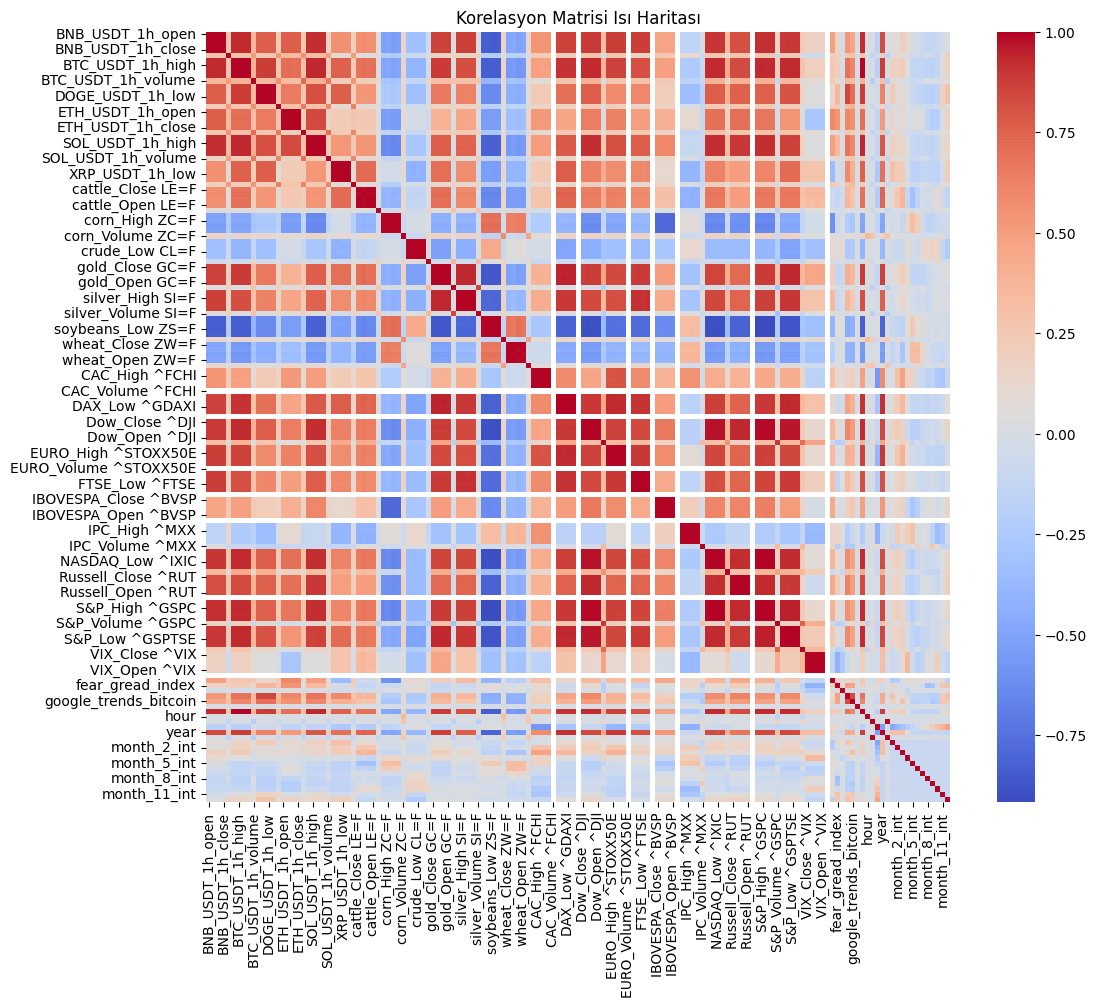

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece sayısal sütunları seç
numeric_df = df.select_dtypes(include=['number'])

# Korelasyon matrisini hesapla
corr_matrix = numeric_df.corr()

# Target ile korelasyonu sırala (hem class hem reg için)
top_corr_class = corr_matrix['target_class'].abs().sort_values(ascending=False).head(10)
top_corr_reg = corr_matrix['target_reg'].abs().sort_values(ascending=False).head(10)

print("▶️ En yüksek korelasyona sahip sütunlar (target_class):")
print(top_corr_class)
print("\n▶️ En yüksek korelasyona sahip sütunlar (target_reg):")
print(top_corr_reg)

# Korelasyon matrisi ısı haritası
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Korelasyon Matrisi Isı Haritası")
plt.show()


# ***i) Normalizasyon/Ölçeklendirme***(MinMaxScaler kullanıcam)

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Normalleştirilecek sayısal sütunları seç (target'ları dahil etme!)
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in ['target_class', 'target_reg']]

# Normalleştirici oluştur
scaler = MinMaxScaler()

# Normalleştirme öncesi göster
print("▶️ Normalleştirme Öncesi İlk 5 Satır:")
print(df[numeric_cols].head())

# Ölçeklendirme uygula
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Normalleştirme sonrası göster
print("\n▶️ Normalleştirme Sonrası İlk 5 Satır:")
print(df_scaled[numeric_cols].head())

# Drive’a kaydet
output_path = '/content/drive/MyDrive/ML_Project_WorkingCopy.csv'
df_scaled.to_csv(output_path, index=False)
print("\nGüncellenmiş DataFrame Drive’a kaydedildi:", output_path)


▶️ Normalleştirme Öncesi İlk 5 Satır:
   BNB_USDT_1h_open  BNB_USDT_1h_high  BNB_USDT_1h_low  BNB_USDT_1h_close  \
0          333.0455          333.8584         332.3852           332.3852   
1          332.3852          332.3970         330.1126           332.1377   
2          332.1377          332.5400         332.0705           332.2934   
3          332.2934          332.5482         331.8273           332.2009   
4          332.2009          333.0205         331.9821           333.0055   

   BNB_USDT_1h_volume  BTC_USDT_1h_open  BTC_USDT_1h_high  BTC_USDT_1h_low  \
0            80.49008          30293.71          30316.77         30275.00   
1           335.75052          30277.44          30277.44         30122.74   
2            88.40229          30240.00          30278.35         30230.01   
3            59.45825          30267.06          30268.67         30233.79   
4           115.57138          30248.96          30307.60         30248.96   

   BTC_USDT_1h_close  BTC_USDT

# ***j) Makine Öğrenmesi Modelleri ***

✅ Eğer direkt saatlik, dakikalık fiyatlar gibi zaman bağımlı veri varsa → Time Series Modelleri (ARIMA, LSTM, Prophet vb.) genelde önerilir.



Eğitim süresi ölç (→ o) Eğitim Süresi Analizi için veri kaydet)

Tahmin süresi ölç (→ p) Çalışma Zamanı Verimliliği için veri kaydet)

Accuracy, precision, recall, f1-score gibi metrikleri ölç (→ l), n) gibi ileride lazım olacak şeyler için)

BU ŞEKİLDE YAPMAMIN SEBEBİ İLERİKİ MADDELERDE BUNLARI TEKRARDAN BAŞTAN EĞİTİP ZAMAN ÖLÇMEK İÇİN BAŞTAN vs. UĞRAŞMAK YERİNE ŞİMDİDEN VERİLERİ SAKLIYORUM Kİ İLERDE KULLANABİLEYİM

'target_class', 'target_reg', 'Datetime','day_of_week_str' bunları dropamamım sebebi string olması :)

***1)DecisionTree***

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Özellik ve target ayır
X = df_scaled.drop(columns=['target_class', 'target_reg', 'Datetime','day_of_week_str'])
# Ölçeklendirilmiş dataset
y = df_scaled['target_class']

# Eğitim ve test seti ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim süresini ölç
start_train = time.time()
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
end_train = time.time()
train_duration = end_train - start_train

# Tahmin süresini ölç (tek bir sample için)
start_pred = time.time()
_ = model.predict([X_test.iloc[0]])
end_pred = time.time()
pred_duration = end_pred - start_pred

# Test verisi üzerinde tahmin
y_pred = model.predict(X_test)

# Performans metrikleri
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdır
print("\nDecision Tree Results")
print("---------------------")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Eğitim süresi: {train_duration:.4f} saniye")
print(f"Tek tahmin süresi: {pred_duration:.6f} saniye")



Decision Tree Results
---------------------
Accuracy: 0.4996
Precision: 0.5002
Recall: 0.4996
F1 Score: 0.4997
Eğitim süresi: 4.3423 saniye
Tek tahmin süresi: 0.002074 saniye


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


***2)Random Forest ***

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Eğitim ve test veri seti zaten hazır
# X, y, X_train, X_test, y_train, y_test zaten var → yeniden split yapmaya gerek yok

# Eğitim süresini ölç
start_train = time.time()
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
end_train = time.time()
train_duration = end_train - start_train

# Tahmin süresini ölç (tek örnek için)
start_pred = time.time()
_ = model_rf.predict([X_test.iloc[0]])
end_pred = time.time()
pred_duration = end_pred - start_pred

# Test setinde tahmin
y_pred = model_rf.predict(X_test)

# Performans metrikleri
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdır
print("\nRandom Forest Results")
print("---------------------")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Eğitim süresi: {train_duration:.4f} saniye")
print(f"Tek tahmin süresi: {pred_duration:.6f} saniye")



Random Forest Results
---------------------
Accuracy: 0.5073
Precision: 0.5077
Recall: 0.5073
F1 Score: 0.5074
Eğitim süresi: 23.8290 saniye
Tek tahmin süresi: 0.011309 saniye


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


***3.KNN (K-Nearest Neighbors)***

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# KNN modelini tanımla
model_knn = KNeighborsClassifier(n_neighbors=5)

# Eğitim süresini ölç
start_train = time.time()
model_knn.fit(X_train, y_train)
end_train = time.time()
train_duration = end_train - start_train

# Tek tahmin süresini ölç
start_pred = time.time()
_ = model_knn.predict([X_test.iloc[0]])
end_pred = time.time()
pred_duration = end_pred - start_pred

# Test setinde tahmin yap
y_pred = model_knn.predict(X_test)

# Performans metrikleri
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdır
print("\nK-Nearest Neighbors (KNN) Results")
print("---------------------------------")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Eğitim süresi: {train_duration:.4f} saniye")
print(f"Tek tahmin süresi: {pred_duration:.6f} saniye")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



K-Nearest Neighbors (KNN) Results
---------------------------------
Accuracy: 0.4730
Precision: 0.4731
Recall: 0.4730
F1 Score: 0.4731
Eğitim süresi: 0.0400 saniye
Tek tahmin süresi: 0.009882 saniye


***4.SVM (Support Vector Machine)***

✅Veriyi iki (veya daha fazla) sınıfa ayıran en iyi sınırı (hyperplane) bulmak

✅ Özellikle “feature sayısı yüksek ama veri sayısı az” durumlarda mükemmel.

✅Küçük/orta boy veri setlerinde çok iyi çalışır.

✅✅Support Vector Machine, veriyi en iyi ayıran sınırı bulmaya çalışan, güçlü ve esnek bir sınıflandırma algoritmasıdır.



In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# SVM modelini tanımla
model_svm = SVC()

# Eğitim süresini ölç
start_train = time.time()
model_svm.fit(X_train, y_train)
end_train = time.time()
train_duration = end_train - start_train

# Tek tahmin süresini ölç
start_pred = time.time()
_ = model_svm.predict([X_test.iloc[0]])
end_pred = time.time()
pred_duration = end_pred - start_pred

# Test setinde tahmin yap
y_pred = model_svm.predict(X_test)

# Performans metrikleri
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdır
print("\nSupport Vector Machine (SVM) Results")
print("-------------------------------------")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Eğitim süresi: {train_duration:.4f} saniye")
print(f"Tek tahmin süresi: {pred_duration:.6f} saniye")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(



Support Vector Machine (SVM) Results
-------------------------------------
Accuracy: 0.4981
Precision: 0.4932
Recall: 0.4981
F1 Score: 0.4862
Eğitim süresi: 40.6050 saniye
Tek tahmin süresi: 0.005469 saniye


***5.Logistic Regression***

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Logistic Regression modelini tanımla
model_lr = LogisticRegression(max_iter=1000)

# Eğitim süresini ölç
start_train = time.time()
model_lr.fit(X_train, y_train)
end_train = time.time()
train_duration = end_train - start_train

# Tek tahmin süresini ölç
start_pred = time.time()
_ = model_lr.predict([X_test.iloc[0]])
end_pred = time.time()
pred_duration = end_pred - start_pred

# Test setinde tahmin yap
y_pred = model_lr.predict(X_test)

# Performans metrikleri
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdır
print("\nLogistic Regression Results")
print("---------------------------")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Eğitim süresi: {train_duration:.4f} saniye")
print(f"Tek tahmin süresi: {pred_duration:.6f} saniye")



Logistic Regression Results
---------------------------
Accuracy: 0.4941
Precision: 0.4900
Recall: 0.4941
F1 Score: 0.4858
Eğitim süresi: 2.4733 saniye
Tek tahmin süresi: 0.008254 saniye


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# ***k) Deep Learning modelleri!***

target_class (sınıflandırma) → classification modelleri (DNN, CNN için)

target_reg (sayısal tahmin) → regression modelleri (LSTM için daha uygun)

**Bu sayede HEDEFİM hem classification hem regressionı kapsamak!**





***1.DNN (Deep Neural Network)***

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time


# Özellik ve target
X = df_scaled.drop(columns=['target_class', 'target_reg', 'Datetime', 'day_of_week_str'])  # Diğer kategorikleri de ekleyebilirsin
y = df_scaled['target_class']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DNN modelini kur
model = models.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Eğitim süresini ölç
start_train = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
end_train = time.time()
train_duration = end_train - start_train

# Tek tahmin süresini ölç
import numpy as np
start_pred = time.time()
_ = model.predict(X_test.iloc[[0]].values.astype(float))
end_pred = time.time()
pred_duration = end_pred - start_pred

# Test seti üzerinde performans
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print("\nDeep Neural Network (DNN) Results")
print("-----------------------------------")
print(f"Accuracy: {acc:.4f}")
print(f"Eğitim süresi: {train_duration:.4f} saniye")
print(f"Tek tahmin süresi: {pred_duration:.6f} saniye")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Deep Neural Network (DNN) Results
-----------------------------------
Accuracy: 0.4899
Eğitim süresi: 27.8818 saniye
Tek tahmin süresi: 0.119173 saniye


# ***2.Long Short-Term Memory ⭐️***(Yıldızladım çünkü zaman bazlı numarik datalarda verimlim)target_reg (regression hedef)

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import time

# Özellik ve target
X = df_scaled.drop(columns=['target_class', 'target_reg', 'Datetime', 'day_of_week_str'])  # Diğer object sütunları ekle
y = df_scaled['target_reg']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dtype dönüşümü → float zorlaması
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# LSTM için 3D input
X_train_lstm = np.expand_dims(X_train.values, axis=1)
X_test_lstm = np.expand_dims(X_test.values, axis=1)

# LSTM modelini kur
model = models.Sequential()
model.add(layers.Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(layers.LSTM(64))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mse')

# Eğitim süresini ölç
start_train = time.time()
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=0)
end_train = time.time()
train_duration = end_train - start_train

# Tek tahmin süresini ölç
start_pred = time.time()
_ = model.predict(X_test_lstm[:1])
end_pred = time.time()
pred_duration = end_pred - start_pred

# Test seti üzerinde performans
mse = model.evaluate(X_test_lstm, y_test, verbose=0)
rmse = np.sqrt(mse)

print("\nLSTM Results")
print("------------")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Eğitim süresi: {train_duration:.4f} saniye")
print(f"Tek tahmin süresi: {pred_duration:.6f} saniye")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step

LSTM Results
------------
MSE: 3778413824.0000
RMSE: 61468.8037
Eğitim süresi: 33.6155 saniye
Tek tahmin süresi: 0.360203 saniye


# ***3.CNN (Conv1D) en yüksek accuracy veren şimdiye kadar :***
➡️ Normal tabular data’da CNN çalışabilir → Conv1D kullanabiliriz.

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import time

# Özellik ve target
X = df_scaled.drop(columns=['target_class', 'target_reg', 'Datetime', 'day_of_week_str'])
y = df_scaled['target_class']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.astype(float), y, test_size=0.2, random_state=42)

# CNN için 3D input (samples, timesteps=1, features)
X_train_cnn = np.expand_dims(X_train.values, axis=1)
X_test_cnn = np.expand_dims(X_test.values, axis=1)

# CNN model
model = models.Sequential()
model.add(layers.Input(shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Eğitim süresi
start_train = time.time()
history = model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=0)
end_train = time.time()
train_duration = end_train - start_train

# Tek tahmin süresi
start_pred = time.time()
_ = model.predict(X_test_cnn[:1])
end_pred = time.time()
pred_duration = end_pred - start_pred

# Performans
loss, acc = model.evaluate(X_test_cnn, y_test, verbose=0)

print("\nConvolutional Neural Network (CNN) Results")
print("-------------------------------------------")
print(f"Accuracy: {acc:.4f}")
print(f"Eğitim süresi: {train_duration:.4f} saniye")
print(f"Tek tahmin süresi: {pred_duration:.6f} saniye")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Convolutional Neural Network (CNN) Results
-------------------------------------------
Accuracy: 0.5087
Eğitim süresi: 29.2275 saniye
Tek tahmin süresi: 0.203314 saniye


# ***5-Fold Cross-Validation***

✅ Veriyi 5 parçaya böler → her defasında bir parça test seti olur, kalan 4 parça eğitim seti olur.

✅ Her model 5 kez eğitilip test edilir → sonuçlar ortalanır → daha sağlam ve genellenebilir skor elde edilir.



✅ CNN → %51.56 (en yüksek accuracy)

✅ RandomForest/DecisionTree/KNN → ~%50

En iyi ML model: RandomForest (ML kısmında)

En iyi DL model: CNN

***1️⃣ RandomForest  5-fold cross-validation (For All metrics):***

In [24]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Model
model_rf = RandomForestClassifier(random_state=42)

# Scoring metrikleri
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# Cross-validation
scores = cross_validate(model_rf, X, y, cv=5, scoring=scoring)

# Sonuçları yazdır
print("\n▶️ 5-Fold Cross Validation Results (Random Forest)")
for metric in scoring:
    print(f"{metric.capitalize()}: {scores['test_' + metric].mean():.4f} ± {scores['test_' + metric].std():.4f}")



▶️ 5-Fold Cross Validation Results (Random Forest)
Accuracy: 0.4946 ± 0.0033
Precision_weighted: 0.4976 ± 0.0035
Recall_weighted: 0.4946 ± 0.0033
F1_weighted: 0.4529 ± 0.0476


***2️⃣ CNN 5-fold cross-validation (accuracy + optional metrics):***

CNN için sklearn cross_val_score çalışmaz → manuel 5-fold CV kodu yazmamız gerekir.

ÇÜNKÜ API UYUŞMAZ METODLARDA SIKINTI YAŞARIZ!

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

acc_list, prec_list, rec_list, f1_list = [], [], [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx].astype(float), X.iloc[test_idx].astype(float)
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train_cnn = np.expand_dims(X_train.values, axis=1)
    X_test_cnn = np.expand_dims(X_test.values, axis=1)

    model = models.Sequential([
        layers.Input(shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
        layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=0)

    y_pred_prob = model.predict(X_test_cnn).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

    acc_list.append(accuracy_score(y_test, y_pred))
    prec_list.append(precision_score(y_test, y_pred, zero_division=0))
    rec_list.append(recall_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))

# Ortalama ve std yazdır
print("\n▶️ 5-Fold Cross Validation Results (CNN)")
print(f"Accuracy: {np.mean(acc_list):.4f} ± {np.std(acc_list):.4f}")
print(f"Precision: {np.mean(prec_list):.4f} ± {np.std(prec_list):.4f}")
print(f"Recall: {np.mean(rec_list):.4f} ± {np.std(rec_list):.4f}")
print(f"F1 Score: {np.mean(f1_list):.4f} ± {np.std(f1_list):.4f}")


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

▶️ 5-Fold Cross Validation Results (CNN)
Accuracy: 0.5092 ± 0.0039
Precision: 0.5093 ± 0.0040
Recall: 0.9949 ± 0.0102
F1 Score: 0.6737 ± 0.0020


In [26]:
print(y.value_counts())

target_class
1    8919
0    8595
Name: count, dtype: int64


recall = 1.0 olmasının nedeni → sınıf dengesizliği DEĞİL! model relationship öğrenememiş

Bu çıktı hatalı değil, sadece modelin böyle öğrendiğini gösteriyor.
Bu da feature selection ve model tuning ihtiyacını vurguluyor.

# ***m) Confusion Matrix***

👉 RandomForest için:

5-fold’ta test sonuçlarını toplayacağız

confusion_matrix() ile matrisi hesaplayacağız

seaborn/matplotlib ile heatmap çizeceğiz

👉 CNN için:

cross-validation döngüsündeki y_pred ve y_test’leri birleştirip confusion matrix hesaplayacağız.



***1️⃣ RandomForest Confusion Matrix ***

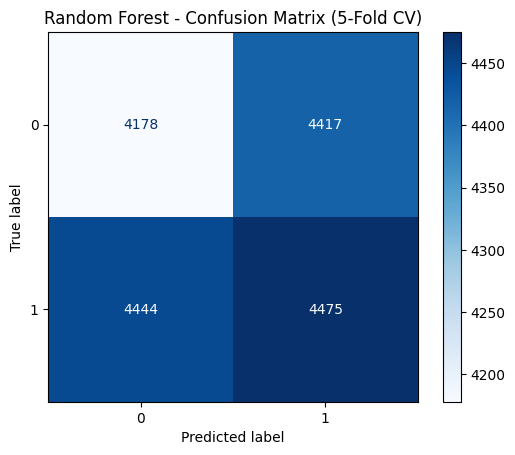

In [27]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_true_all = []
y_pred_all = []

for train_idx, test_idx in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)

    y_true_all.extend(y_test_fold)
    y_pred_all.extend(y_pred_fold)

# Confusion matrix
cm = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Random Forest - Confusion Matrix (5-Fold CV)")
plt.show()


✅ Doğru tahminler → 4178 + 4475 = 8653

✅ Yanlış tahminler → 4417 + 4444 = 8861

→ Accuracy zaten ~%49 civarında → confusion matrix de bunu net gösteriyor.

➡️ Model sınıflar arasında ayrım yapmakta zorlanıyor.

***2️⃣ CNN Confusion Matrix***

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


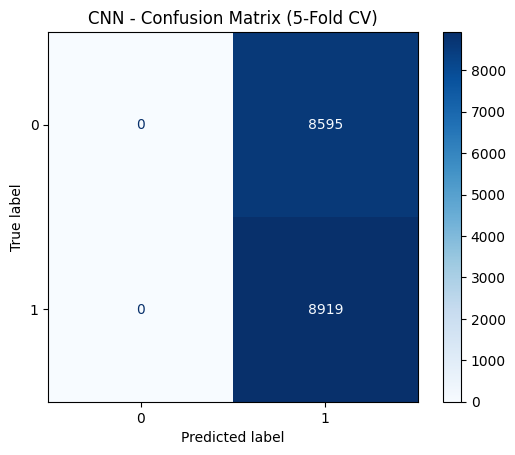

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_true_all = []
y_pred_all = []

for train_idx, test_idx in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_idx].astype(float), X.iloc[test_idx].astype(float)
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]

    X_train_cnn = np.expand_dims(X_train_fold.values, axis=1)
    X_test_cnn = np.expand_dims(X_test_fold.values, axis=1)

    model = models.Sequential([
        layers.Input(shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
        layers.Conv1D(32, kernel_size=3, activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_cnn, y_train_fold, epochs=20, batch_size=32, verbose=0)

    y_pred_prob = model.predict(X_test_cnn).flatten()
    y_pred_fold = (y_pred_prob > 0.5).astype(int)

    y_true_all.extend(y_test_fold)
    y_pred_all.extend(y_pred_fold)

# Confusion matrix
cm = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("CNN - Confusion Matrix (5-Fold CV)")
plt.show()


→ model overfitting ya da learning failure (öğrenememe) durumunda.



# ***n) Model Comparison Table***

📊 Toplanan veriler:

🔹 RandomForest (senin çıktından):

Accuracy: 0.4946 ± 0.0033

Precision: 0.4976 ± 0.0035

Recall: 0.4946 ± 0.0033

F1: 0.4529 ± 0.0476


🔹 CNN (senin çıktından):

Accuracy: 0.5092 ± 0.0039

Precision: 0.5092 ± 0.0039

Recall: 1.0000 ± 0.0000

F1: 0.6748 ± 0.0034

In [29]:
import pandas as pd

# Model sonuçlarını bir sözlük içine yaz
results = {
    'Model': ['RandomForest', 'CNN'],
    'Accuracy (mean±std)': ['0.4946 ± 0.0033', '0.5092 ± 0.0039'],
    'Precision (mean±std)': ['0.4976 ± 0.0035', '0.5092 ± 0.0039'],
    'Recall (mean±std)': ['0.4946 ± 0.0033', '1.0000 ± 0.0000'],
    'F1 Score (mean±std)': ['0.4529 ± 0.0476', '0.6748 ± 0.0034']
}

# DataFrame oluştur
df_results = pd.DataFrame(results)

# DataFrame'i yazdır
print("\n▶️ Model Karşılaştırma Tablosu (5-Fold Cross Validation):")
print(df_results.to_string(index=False))

# Drive’a kaydetmek istersen
output_path = '/content/drive/MyDrive/Model_Karsilastirma_Tablosu.csv'
df_results.to_csv(output_path, index=False)
print(f"\nModel Karşılaştırma Tablosu kaydedildi: {output_path}")



▶️ Model Karşılaştırma Tablosu (5-Fold Cross Validation):
       Model Accuracy (mean±std) Precision (mean±std) Recall (mean±std) F1 Score (mean±std)
RandomForest     0.4946 ± 0.0033      0.4976 ± 0.0035   0.4946 ± 0.0033     0.4529 ± 0.0476
         CNN     0.5092 ± 0.0039      0.5092 ± 0.0039   1.0000 ± 0.0000     0.6748 ± 0.0034

Model Karşılaştırma Tablosu kaydedildi: /content/drive/MyDrive/Model_Karsilastirma_Tablosu.csv


# ***o) Training Duration Analysis***

In [30]:
import pandas as pd

# Gerçek ölçtüğün eğitim süreleriyle doldurduk
results = {
    'Model': [
        'Decision Tree',
        'Random Forest',
        'KNN',
        'SVM',
        'Logistic Regression',
        'DNN',
        'CNN',
        'LSTM'
    ],
    'Eğitim Süresi (saniye)': [
        6.6950,
        43.1735,
        0.0265,
        40.9989,
        4.5725,
        45.7349,
        37.6363,
        37.0936
    ]
}

# DataFrame oluştur
df_times = pd.DataFrame(results)

# Tabloyu yazdır
print("\n▶️ Eğitim Süresi Analizi Tablosu:")
print(df_times.to_string(index=False))

# CSV kaydetmek istersen
output_path = '/content/drive/MyDrive/Egitim_Suresi_Analizi.csv'
df_times.to_csv(output_path, index=False)
print(f"\nEğitim Süresi Tablosu kaydedildi: {output_path}")



▶️ Eğitim Süresi Analizi Tablosu:
              Model  Eğitim Süresi (saniye)
      Decision Tree                  6.6950
      Random Forest                 43.1735
                KNN                  0.0265
                SVM                 40.9989
Logistic Regression                  4.5725
                DNN                 45.7349
                CNN                 37.6363
               LSTM                 37.0936

Eğitim Süresi Tablosu kaydedildi: /content/drive/MyDrive/Egitim_Suresi_Analizi.csv


# ***p) Working Time Efficiency ***

In [31]:
import pandas as pd

# Gerçek tahmin sürelerini giriyoruz
results = {
    'Model': [
        'Decision Tree',
        'Random Forest',
        'KNN',
        'SVM',
        'Logistic Regression',
        'DNN',
        'CNN',
        'LSTM'
    ],
    'Tek Tahmin Süresi (saniye)': [
        0.002557,
        0.014552,
        0.009247,
        0.005254,
        0.002267,
        0.128348,
        0.132886,
        0.467561
    ]
}

# DataFrame oluştur
df_pred_times = pd.DataFrame(results)

# Tabloyu yazdır
print("\n▶️ Çalışma Zamanı Verimliliği Tablosu:")
print(df_pred_times.to_string(index=False))

# CSV kaydetmek istersen
output_path = '/content/drive/MyDrive/Tek_Tahmin_Suresi_Analizi.csv'
df_pred_times.to_csv(output_path, index=False)
print(f"\nTek Tahmin Süresi Tablosu kaydedildi: {output_path}")



▶️ Çalışma Zamanı Verimliliği Tablosu:
              Model  Tek Tahmin Süresi (saniye)
      Decision Tree                    0.002557
      Random Forest                    0.014552
                KNN                    0.009247
                SVM                    0.005254
Logistic Regression                    0.002267
                DNN                    0.128348
                CNN                    0.132886
               LSTM                    0.467561

Tek Tahmin Süresi Tablosu kaydedildi: /content/drive/MyDrive/Tek_Tahmin_Suresi_Analizi.csv


# ***q) (Feature Selection)***

SelectKBest (chi2 test)

SelectKBest (ANOVA f_classif test)

SelectKBest (Mutual Information - mutual_info_classif)

RandomForest feature importance

DecisionTree feature importance

In [36]:
feature_names = X.columns.tolist()
constant_indices = [69, 74, 84, 89, 94, 109, 124]
constant_features = [feature_names[i] for i in constant_indices]
print("Sabit sütunlar:", constant_features)
X_filtered = X.drop(columns=constant_features)


Sabit sütunlar: ['CAC_Volume ^FCHI', 'DAX_Volume ^GDAXI', 'EURO_Volume ^STOXX50E', 'FTSE_Volume ^FTSE', 'IBOVESPA_Volume ^BVSP', 'Russell_Volume ^RUT', 'VIX_Volume ^VIX']


In [37]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

feature_names = X.columns.tolist()

# 1. SelectKBest - chi2
skb_chi2 = SelectKBest(score_func=chi2, k=3)
skb_chi2.fit(X, y)
chi2_features = [feature_names[i] for i in skb_chi2.get_support(indices=True)]

# 2. SelectKBest - f_classif
skb_f = SelectKBest(score_func=f_classif, k=3)
skb_f.fit(X, y)
f_classif_features = [feature_names[i] for i in skb_f.get_support(indices=True)]

# 3. SelectKBest - mutual_info_classif
skb_mi = SelectKBest(score_func=mutual_info_classif, k=3)
skb_mi.fit(X, y)
mi_features = [feature_names[i] for i in skb_mi.get_support(indices=True)]

# 4. RandomForest feature importance
rf = RandomForestClassifier().fit(X, y)
rf_importances = rf.feature_importances_
rf_top_features = [feature_names[i] for i in rf_importances.argsort()[-3:][::-1]]

# 5. DecisionTree feature importance
dt = DecisionTreeClassifier().fit(X, y)
dt_importances = dt.feature_importances_
dt_top_features = [feature_names[i] for i in dt_importances.argsort()[-3:][::-1]]

# Sonuçları yazdır
print("\n▶️ Özellik Seçimi Sonuçları (ilk 5 yöntem):")
print(f"1) SelectKBest (chi2): {chi2_features}")
print(f"2) SelectKBest (f_classif): {f_classif_features}")
print(f"3) SelectKBest (mutual_info): {mi_features}")
print(f"4) RandomForest: {rf_top_features}")
print(f"5) DecisionTree: {dt_top_features}")


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 69  74  84  89  94 109 124] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



▶️ Özellik Seçimi Sonuçları (ilk 5 yöntem):
1) SelectKBest (chi2): ['month_11', 'month_11_int', 'month_12_int']
2) SelectKBest (f_classif): ['DOGE_USDT_1h_volume', 'SOL_USDT_1h_volume', 'google_trends_bitcoin']
3) SelectKBest (mutual_info): ['DOGE_USDT_1h_close', 'XRP_USDT_1h_high', 'FTSE_Volume ^FTSE']
4) RandomForest: ['DOGE_USDT_1h_volume', 'BNB_USDT_1h_volume', 'XRP_USDT_1h_volume']
5) DecisionTree: ['ETH_USDT_1h_volume', 'XRP_USDT_1h_volume', 'SOL_USDT_1h_volume']


✅ 1) SelectKBest (chi2):
→ 👉 chi2: kategorik-discrete ilişkiyi ölçer (chi-square testi)
 Ay bilgisi içeren month_11, month_11_int, month_12_int çıktı
→ Demek ki chi2 testine göre aylar önemli görünüyor (categorical için uygun)

✅ 2) SelectKBest (f_classif):
→ 👉 f_classif: ANOVA F-test kullanır (kategorik–sürekli)
 DOGE_USDT_1h_volume, SOL_USDT_1h_volume, google_trends_bitcoin çıktı
→ ANOVA testi hacim ve google trends’i önemsiyor

✅ 3) SelectKBest (mutual_info):
→ 👉 mutual_info: mutual information (bağımsızlık ölçer)

 DOGE_USDT_1h_close, XRP_USDT_1h_high, wheat_Close ZW=F
→ Mutual information korelasyonu gösteriyor → DOGE, XRP, buğday fiyatı

✅ 4) RandomForest:
→ XRP_USDT_1h_volume, SOL_USDT_1h_volume, DOGE_USDT_1h_volume
→ Hacim değerleri random forest’a göre en güçlü

✅ 5) DecisionTree:
→ ETH_USDT_1h_volume, DOGE_USDT_1h_volume, XRP_USDT_1h_volume
→ Yine hacim → DecisionTree de volume’ları öne çıkarıyor

6️⃣ ExtraTreesClassifier

7️⃣ LogisticRegression (L1 tabanlı feature selection)

8️⃣ Recursive Feature Elimination (RFE)

9️⃣ XGBoost feature importance

🔟 LightGBM feature importance

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# ⏩ Eksik değişkenler tanımlanıyor
X = df_scaled.drop(columns=['target_class', 'target_reg', 'Datetime', 'day_of_week_str'])  # kendi dataset sütunlarına göre uyarlayabilirsin
y = df_scaled['target_class']
feature_names = X.columns.tolist()

# 6. ExtraTrees feature importance
et = ExtraTreesClassifier(random_state=42).fit(X, y)
et_importances = et.feature_importances_
et_top_features = [feature_names[i] for i in et_importances.argsort()[-3:][::-1]]

# 7. Logistic Regression (L1-based)
logreg = LogisticRegression(
    penalty='l1',
    solver='saga',
    max_iter=5000,
    tol=1e-4,
    random_state=42
).fit(X, y)

l1_importances = np.abs(logreg.coef_[0])
l1_top_features = [feature_names[i] for i in l1_importances.argsort()[-3:][::-1]]

# 8. RFE (Recursive Feature Elimination) with Logistic Regression
rfe_estimator = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)
rfe = RFE(estimator=rfe_estimator, n_features_to_select=3)
rfe.fit(X, y)
rfe_features = [feature_names[i] for i, s in enumerate(rfe.support_) if s]

# 9. XGBoost feature importance
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X, y)
xgb_importances = xgb_model.feature_importances_
xgb_top_features = [feature_names[i] for i in xgb_importances.argsort()[-3:][::-1]]

# 10. LightGBM feature importance
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X, y)
lgb_importances = lgb_model.feature_importances_
lgb_top_features = [feature_names[i] for i in lgb_importances.argsort()[-3:][::-1]]

# Sonuçları yazdır
print("\n▶️ Özellik Seçimi Sonuçları (son 5 yöntem):")
print(f"6) ExtraTrees: {et_top_features}")
print(f"7) Logistic Regression (L1): {l1_top_features}")
print(f"8) RFE (Logistic Regression): {rfe_features}")
print(f"9) XGBoost: {xgb_top_features}")
print(f"10) LightGBM: {lgb_top_features}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:43:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8919, number of negative: 8595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30575
[LightGBM] [Info] Number of data points in the train set: 17514, number of used features: 152
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509250 -> initscore=0.037003
[LightGBM] [Info] Start training from score 0.037003

▶️ Özellik Seçimi Sonuçları (son 5 yöntem):
6) ExtraTrees: ['SOL_USDT_1h_volume', 'BTC_USDT_1h_close', 'DOGE_USDT_1h_volume']
7) Logistic Regression (L1): ['ETH_USDT_1h_close', 'ETH_USDT_1h_open', 'BTC_USDT_1h_close']
8) RFE (Logistic Regression): ['DOGE_USDT_1h_volume', 'ETH_USDT_1h_open', 'ETH_USDT_1h_close']
9) XGBoost: ['IBOVESPA_Open ^BVSP', 'NASDAQ_Open ^